In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [ ]:
# Specify directory:
# dir = 'HFOFO-G4bl/'
dir = 'Yuri%27s_files/'

In [ ]:
# RF period (325 MHz frequency):
T = 1/(325*10**6)*10**9 # ns

# Load data from output txt files:
initial_data = np.loadtxt(dir+'out1.txt')
final_data = np.loadtxt(dir+'out31.txt')

In [18]:
# Values for inital detector:
xi = []; yi = []; zi = []
pxi = []; pyi = []; pzi = []; ptotali = []
ti = []; mod_ti = []
for i in range(initial_data.shape[0]):
    xi.append(initial_data[i][0]/10) # mm -> cm
    yi.append(initial_data[i][1]/10)
    zi.append(initial_data[i][2]/10)
    px = initial_data[i][3]; py = initial_data[i][4]; pz = initial_data[i][5]
    pxi.append(px) # MeV/c
    pyi.append(py)
    pzi.append(pz)
    ptotali.append(np.sqrt(px**2+py**2+pz**2))
    # ptotali.append(np.sqrt(px**2+py**2))
    t = initial_data[i][6]
    ti.append(t) # ns
    mod_t = t % T
    if mod_t > T/2:
        mod_ti.append(mod_t-3.0)
    else:
        mod_ti.append(mod_t)
    # mod_ti.append(mod_t)
    del px, py, pz, t

In [19]:
# Values for final detector:
xf = []; yf = []; zf = []
pxf = []; pyf = []; pzf = []; ptotalf = []
tf = []; mod_tf = []
for i in range(final_data.shape[0]):
    xf.append(final_data[i][0]/10) # mm -> cm
    yf.append(final_data[i][1]/10)
    zf.append(final_data[i][2]/10)
    px = final_data[i][3]; py = final_data[i][4]; pz = final_data[i][5]
    pxf.append(px) # MeV/c
    pyf.append(py)
    pzf.append(pz)
    ptotalf.append(np.sqrt(px**2+py**2+pz**2))
    # ptotalf.append(np.sqrt(px**2+py**2))
    t = final_data[i][6]
    tf.append(t) # ns
    mod_t = t % T
    if mod_t > T/2:
        mod_tf.append(mod_t-3.0)
    else:
        mod_tf.append(mod_t)
    # mod_tf.append(mod_t)
    del px, py, pz, t

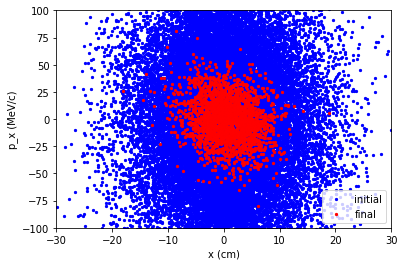

In [20]:
# Plot px vs x:
point_size = 5
plt.scatter(xi,pxi,color='blue',label='initial',s=point_size)
plt.scatter(xf,pxf,color='red',label='final',s=point_size)
plt.xlim(-30,30)
plt.ylim(-100,100)
plt.xlabel('x (cm)')
plt.ylabel('p_x (MeV/c)')
plt.legend()

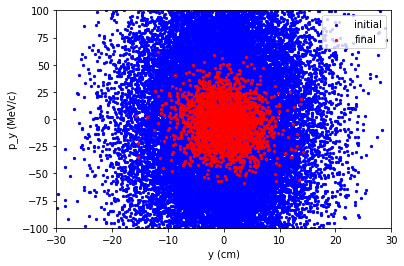

In [21]:
# Plot py vs y:
plt.scatter(yi,pyi,color='blue',label='initial',s=point_size)
plt.scatter(yf,pyf,color='red',label='final',s=point_size)
plt.xlim(-30,30)
plt.ylim(-100,100)
plt.xlabel('y (cm)')
plt.ylabel('p_y (MeV/c)')
plt.legend()

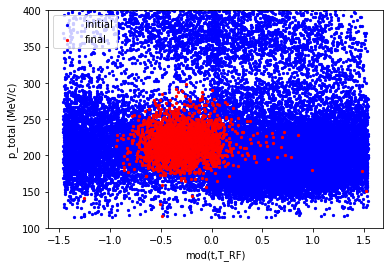

In [22]:
# Plot total p vs t:
plt.scatter(mod_ti,ptotali,color='blue',label='initial',s=point_size)
plt.scatter(mod_tf,ptotalf,color='red',label='final',s=point_size)
plt.ylim(100,400)
plt.xlabel('mod(t,T_RF)')
plt.ylabel('p_total (MeV/c)')
plt.legend()

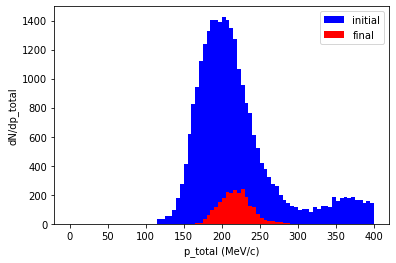

In [23]:
# Plot total p distribution:
plt.hist(ptotali,color='blue',label='initial',range=(0,400),bins=80) # bins of 5
plt.hist(ptotalf,color='red',label='final',range=(0,400),bins=80)
plt.xlabel('p_total (MeV/c)')
plt.ylabel('dN/dp_total')
plt.legend()

In [24]:
# Compute beam loss down channel:
loss = 1 - len(ptotalf)/len(ptotali)
print(loss)

0.9281117797771554


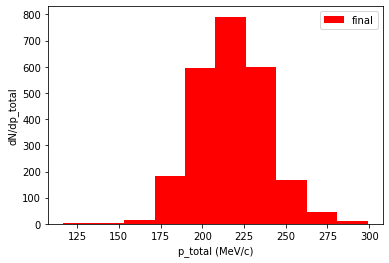

In [25]:
# Plot total p distribution (final only):
plt.hist(ptotalf,color='red',label='final')
plt.xlabel('p_total (MeV/c)')
plt.ylabel('dN/dp_total')
plt.legend()
# plt.title('final p_total distribution')

In [26]:
# Values for all detectors:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []
t_vals = []
for j in range(31):

    # Load data from output txt files:
    data = np.loadtxt(dir+'out'+str(j+1)+'.txt')

    # Values for each detector:
    x = []; y = []; z = []
    px = []; py = []; pz = []
    t = []
    for i in range(data.shape[0]):
        x.append(data[i][0]/10) # mm -> cm
        y.append(data[i][1]/10)
        z.append(data[i][2]/10)
        px.append(data[i][3]) # MeV/c
        py.append(data[i][4])
        pz.append(data[i][5])
        t.append(data[i][6]) # ns

    # Values for entire channel:
    x_vals.append(x)
    y_vals.append(y)
    z_vals.append(z)
    px_vals.append(px)
    py_vals.append(py)
    pz_vals.append(pz)
    t_vals.append(t)

Text(0, 0.5, 'Loss')

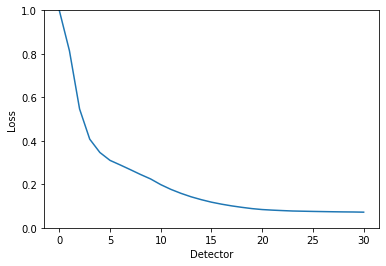

In [27]:
# Plot loss at each detector:
plt.plot([(len(i)/len(x_vals[0])) for i in x_vals])
plt.ylim(0,1)
plt.xlabel('Detector')
plt.ylabel('Loss')

In [ ]:
z

In [ ]:
# ax = plt.axes(projection ='3d')
# ax.plot3D(z, x, y)